In [1]:
# Importing Required Libraries
import numpy as np           # Refer Numpy for Machine Learing Repo
import pandas as pd          # Refer Pandas for Machine Learing Repo
import matplotlib.pyplot as plt   # Plotting Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
# Loading our data from csv Files...
df = pd.read_csv('data.csv',nrows=15000)   # _df -> Dataframe common convention used

In [3]:
df.head()   # Looking how the data is present in our data file(Train)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Here the data is present in series and assosiated with the label.
# Now we need to convert the data into arrays. It can be done by using "values" property of series
# train_df.values can do this job. But, we have the data along with the labels. We need to seperate them.
# Using drop('column_name',axis) Refer pandas for machine learing for details....
# Converting all the data avaliable in our dataframe into array
X = df.drop(['label'],axis = 1).values
y = df.label.values

In [5]:
print("X.shape: ",X.shape) 
# Output (15000,784) representing we have 15000 images to train and each image of 784 pixel values - 28x28

X.shape:  (15000, 784)


In [6]:
# Lets Print one of the image present in X
print(X[0]) # Outputs 784 pixel values

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  29 207 253 235  77   0   

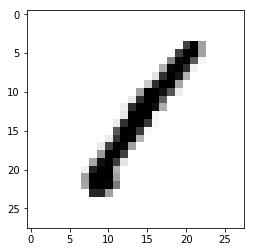

In [7]:
# I think its hard to find what is the image for the above printed pixel values...
# Lets plot and see visually...
# plt.imshow(Image_array) - Shows the image, Image_array need to be passed as parameter...
# But, Notice the above sequence of pixel values are array in single dimention, But we can plot in two-dimentions only.
# So, Reshaping the avaliable arrays into two dimentions, converting 784 to 28x28
# Image_array.reshape(rows,cols) Ex: X[0].reshape(28,28)

plt.imshow(X[0].reshape(28,28),cmap='binary') # Try removing cmap-option; Here it just improve our visiablity...

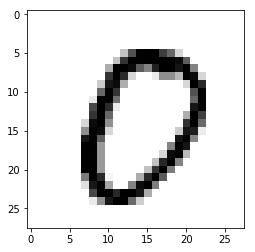

In [11]:
# To see random images Try running this cell repetadly...
plt.imshow(X[np.random.randint(0,len(X)-1)].reshape(28,28),cmap='binary')

In [ ]:
# Running the above cell repetedly you might see the random digits...

In [12]:
# Now to train and test the model we need our data to be splitted into train and test sets...
# The splitting can be done by train_test_split() - func
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
print("Length of X_train",len(X_train))
print("Length of X_train",len(X_test))

Length of X_train 12000
Length of X_train 3000


In [14]:
# Before training our model. You might have observed that our image pixel values are in range of 0 to 255...
# Training model directly with those values would use large amount of RAM and Most importantly Our model struggle to find appropriate weights that best fit our model
# So, we need to normalize the data...
# It can be done by simply dividing all the pixel valus with 255. Results all the pixel values to be in range of 0-1..
# Thus our model fits data better...

X_train = X_train/255
X_test = X_test/255

In [15]:
# Now lets see how our data has normalized...
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# Defining Our Model
model = LogisticRegression()

In [17]:
# fit() method starts training our model
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# We have done Training our model successfully... Now lets see how our model performs on test set..
model.score(X_test,y_test)

0.8983333333333333

#### Here, Our model score is about 89.83%. Quiet Good!!!

#### You have successfully completed training your Machine Learing Model for digit classification....

In [90]:
import cv2
image = cv2.imread('test.png',cv2.IMREAD_GRAYSCALE)
image = np.ravel(image)

In [96]:
model.predict_proba(image.reshape(1,-1)/255)

array([[2.68687096e-06, 1.96915268e-03, 6.91154021e-03, 3.96571871e-03,
        4.90224617e-01, 2.68147566e-02, 7.10286631e-04, 1.41157217e-02,
        2.70943274e-03, 4.52576087e-01]])

Final Prediction : 3


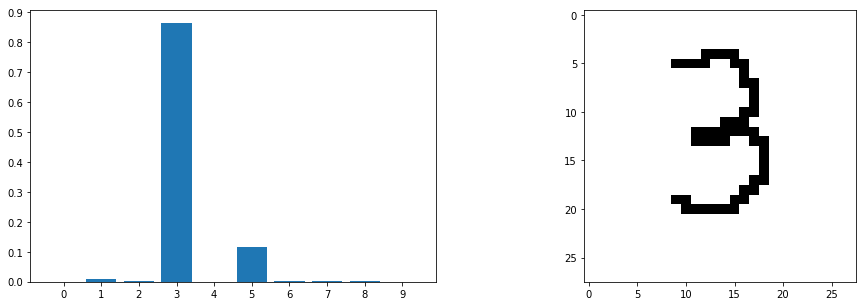

In [108]:
# To Test The model perfomance Run the below script...
import cv2
image = cv2.imread(r'Data\test.png',cv2.IMREAD_GRAYSCALE)
image = np.ravel(image)/255
predictions = model.predict_proba(image.reshape(1,-1))
_,axs = plt.subplots(1,2,figsize=(16,5))
axs[0].bar(list(range(10)),predictions[0])
axs[0].set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
axs[0].set_xticks(range(10))
axs[1].imshow(image.reshape(28,28),cmap='binary')
print("Final Prediction :",np.argmax(predictions[0]))